In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_wine

In [ ]:
# df = pd.DataFrame(data=load_wine().data, columns=load_wine().feature_names)
df = pd.read_csv('wine.csv')

df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [ ]:
df.shape

(6497, 13)

In [ ]:
X = df.iloc[:,0:12].values
y = df.iloc[:,12].values
print(X.size,y.size)

77964 6497


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 0)

In [ ]:
# pre processing
#standard scaler is used for normalization using z score

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [ ]:
# Applying PCA function

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variables = pca.explained_variance_ratio_

In [ ]:
# Fitting Logistic Regression

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
# Prediction
y_pred = classifier.predict(X_test)

In [ ]:
# confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[989,   0],
       [311,   0]])

<ipython-input-117-6d84ab3fe850>:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


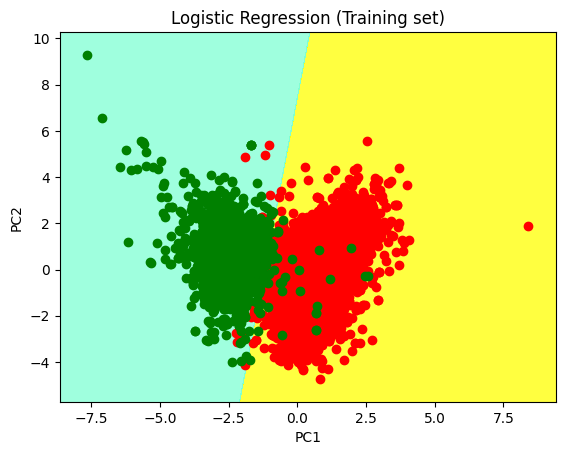

In [ ]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1,
                               stop=X_set[:, 0].max() + 1, step=0.01),
                    np.arange(start=X_set[:, 1].min() - 1,
                               stop=X_set[:, 1].max() + 1, step=0.01))

# Corrected contourf function
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('yellow', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [ ]:
# from matplotlib.colors import ListedColormap

# # Assuming X_train has more than two features, and you want to visualize the decision boundary for the first two features (PC1 and PC2)
# X_set, y_set = X_train[:, :2], y_train

# # Create a meshgrid for visualization
# X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
#                      np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

# # Get the original features corresponding to the meshgrid points
# Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T)

# # Reshape the prediction to match the shape of X1 or X2
# Z = Z.reshape(X1.shape)

# # Plot decision boundary
# plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('yellow', 'white', 'aquamarine')))

# # Scatter plot of training set
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
#                 c=ListedColormap(('red', 'green', 'blue'))(i), label=j)

# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# plt.title('Logistic Regression (Training set)')
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.legend()
# plt.show()
